# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_seq(seqs, dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.

    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test  = np.asarray(test_labels).astype("float32")

17465344/17464789 [==============================] - 0s 0us/step


#### 2가지의 모델 설정

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model_1 = Sequential([Dense(16, activation = 'relu', input_shape = (10000, ), name = 'input'),
                     Dense(16, activation = 'relu', name = 'hidden'),
                     Dense(1, activation = 'sigmoid', name = 'output')])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2 = Sequential([Dense(7, activation = 'relu', input_shape = (10000, ), name = 'input2'),
                      Dense(7, activation = 'relu', name = 'hidden2'),
                      Dense(1, activation = 'sigmoid', name = 'output2')])


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 7)                 70007     
_________________________________________________________________
hidden2 (Dense)              (None, 7)                 56        
_________________________________________________________________
output2 (Dense)              (None, 1)                 8         
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

model_2.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

#### 2개의 모델 학습

In [ ]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs = 20,
                           batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.4496 - acc: 0.8188 - val_loss: 0.3321 - val_acc: 0.8786
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2556 - acc: 0.9102 - val_loss: 0.3062 - val_acc: 0.8771
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1980 - acc: 0.9289 - val_loss: 0.2816 - val_acc: 0.8886
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1649 - acc: 0.9411 - val_loss: 0.2996 - val_acc: 0.8821
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1448 - acc: 0.9479 - val_loss: 0.3149 - val_acc: 0.8802
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1245 - acc: 0.9559 - val_loss: 0.3350 - val_acc: 0.8766
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1071 - acc: 0.9632 - val_loss: 0.3822 - val_acc: 0.8662
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.0939 - a

In [ ]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs = 20,
                           batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.5293 - acc: 0.7824 - val_loss: 0.4126 - val_acc: 0.8756
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3215 - acc: 0.9011 - val_loss: 0.3296 - val_acc: 0.8730
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2364 - acc: 0.9226 - val_loss: 0.3024 - val_acc: 0.8791
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1942 - acc: 0.9348 - val_loss: 0.2887 - val_acc: 0.8859
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1686 - acc: 0.9426 - val_loss: 0.2907 - val_acc: 0.8846
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1481 - acc: 0.9505 - val_loss: 0.2999 - val_acc: 0.8824
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1323 - acc: 0.9564 - val_loss: 0.3132 - val_acc: 0.8794
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1185 - a

#### 비교

In [ ]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

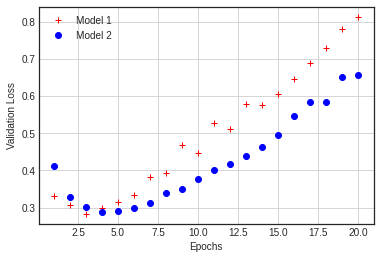

In [ ]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()
plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [ ]:
model_3 = Sequential([Dense(1024, activation = 'relu', input_shape = (10000, ), name = 'input3'),
                      Dense(1024, activation = 'relu', name = 'hidden3'),
                      Dense(1, activation = 'sigmoid', name = 'output3')])

model_3.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [ ]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs = 20,
                           batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 33s 665ms/step - loss: 0.5550 - acc: 0.8003 - val_loss: 0.3218 - val_acc: 0.8657
Epoch 2/20
49/49 [==============================] - 32s 648ms/step - loss: 0.2157 - acc: 0.9137 - val_loss: 0.3931 - val_acc: 0.8419
Epoch 3/20
49/49 [==============================] - 32s 651ms/step - loss: 0.1182 - acc: 0.9571 - val_loss: 0.4216 - val_acc: 0.8425
Epoch 4/20
49/49 [==============================] - 32s 650ms/step - loss: 0.0616 - acc: 0.9848 - val_loss: 0.4765 - val_acc: 0.8809
Epoch 5/20
49/49 [==============================] - 32s 652ms/step - loss: 0.0915 - acc: 0.9852 - val_loss: 0.4815 - val_acc: 0.8835
Epoch 6/20
49/49 [==============================] - 32s 649ms/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.6732 - val_acc: 0.8847
Epoch 7/20
49/49 [==============================] - 32s 651ms/step - loss: 0.1758 - acc: 0.9879 - val_loss: 0.5268 - val_acc: 0.8828
Epoch 8/20
49/49 [==============================] - 32s 651ms/step - 

#### 시각화

In [ ]:
model_3_val_loss = model_3_hist.history['val_loss']

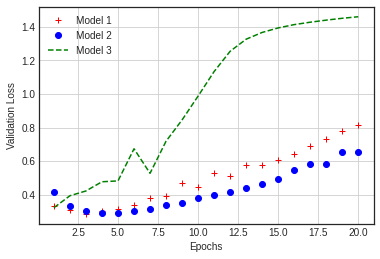

In [ ]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label = 'Model 3')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

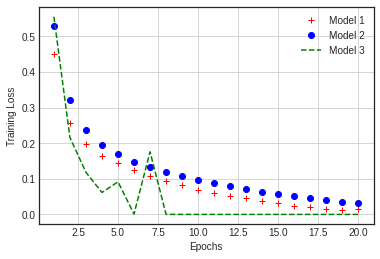

In [ ]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']


plt.plot(epochs, model_1_train_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label = 'Model 3')

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential


In [ ]:
model = Sequential([Dense(30, kernel_initializer = 'he_normal', input_shape = [10, 10]),
                    LeakyReLU(alpha = 0.2),
                    Dense(1, kernel_initializer = 'he_normal'),
                    Activation("softmax")])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 30)            330       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 30)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             31        
_________________________________________________________________
activation (Activation)      (None, 10, 1)             0         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [ ]:
optimizer = SGD(learning_rate = 0.001, momentum = 0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [ ]:
optimizer = SGD(learning_rate = 0.001, momentum = 0.9, 
                nesterov = True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [ ]:
from tensorflow.keras.optimizers import Adagrad

In [ ]:
optimizer = Adagrad(learning_rate = 0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
optimizer = RMSprop(learning_rate = 0.001, rho = 0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999 )

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


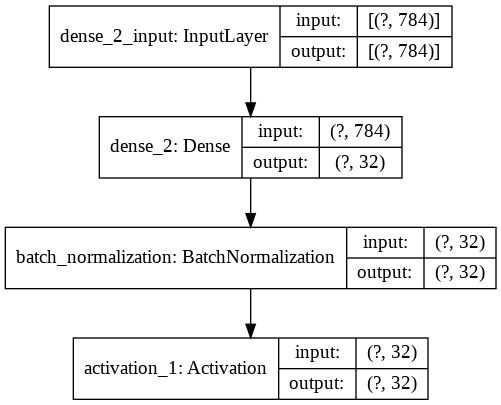

In [ ]:
model = Sequential()

model.add(Dense(32, input_shape = (28 * 28,), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes = True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


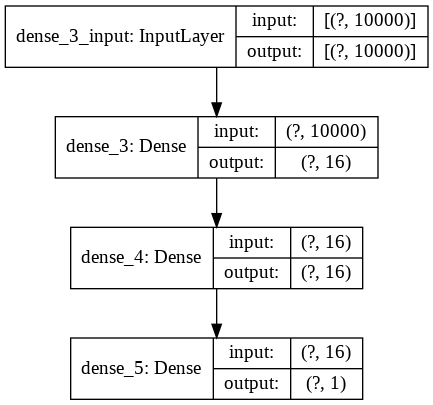

In [ ]:
l2_model = Sequential([Dense(16, kernel_regularizer = l2(0.001), activation = 'relu', input_shape = (10000, )),
                       Dense(16, kernel_regularizer = l2(0.001), activation = 'relu'),
                       Dense(1, activation = 'sigmoid')])

l2_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes = True)

#### 모델 학습

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs = 20,
                             batch_size = 512,
                             validation_data = (x_test, y_test))
# validation loss가 못 오르게 하는 규제 역할함!

Epoch 1/20
49/49 [==============================] - 3s 61ms/step - loss: 0.4875 - acc: 0.8170 - val_loss: 0.4120 - val_acc: 0.8491
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3086 - acc: 0.9045 - val_loss: 0.3313 - val_acc: 0.8881
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2681 - acc: 0.9196 - val_loss: 0.3501 - val_acc: 0.8776
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2468 - acc: 0.9291 - val_loss: 0.3474 - val_acc: 0.8805
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2344 - acc: 0.9345 - val_loss: 0.3407 - val_acc: 0.8840
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2269 - acc: 0.9370 - val_loss: 0.3483 - val_acc: 0.8817
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2186 - acc: 0.9411 - val_loss: 0.3940 - val_acc: 0.8682
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2122 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

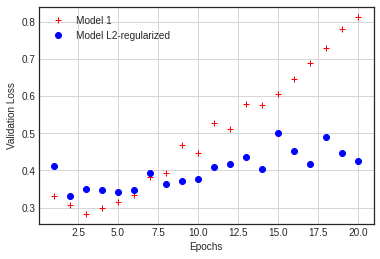

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label = 'Model L2-regularized')
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

#### L1과 비교

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


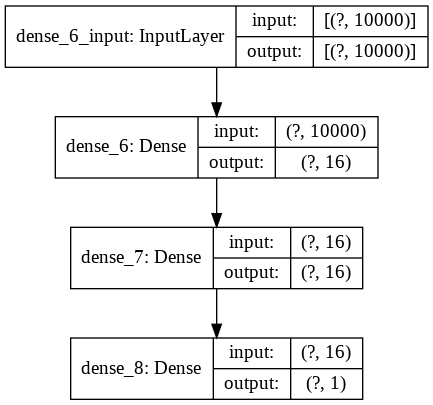

In [ ]:
l1_model = Sequential([Dense(16, kernel_regularizer = l1(0.0001), activation = 'relu', input_shape = (10000, )),
                       Dense(16, kernel_regularizer = l1(0.0001), activation = 'relu'),
                       Dense(1, activation = 'sigmoid')])

l1_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes = True)

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs = 20,
                             batch_size = 512,
                             validation_data = (x_test, y_test))
# validation loss가 못 오르게 하는 규제 역할함!
# 오버피팅 안되게 하는 또 다른 방식임!

Epoch 1/20
49/49 [==============================] - 2s 43ms/step - loss: 0.5575 - acc: 0.8138 - val_loss: 0.4363 - val_acc: 0.8666
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3704 - acc: 0.8952 - val_loss: 0.3700 - val_acc: 0.8883
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3309 - acc: 0.9061 - val_loss: 0.3770 - val_acc: 0.8796
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3135 - acc: 0.9124 - val_loss: 0.3703 - val_acc: 0.8819
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3005 - acc: 0.9180 - val_loss: 0.3638 - val_acc: 0.8863
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2937 - acc: 0.9202 - val_loss: 0.3882 - val_acc: 0.8774
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2857 - acc: 0.9232 - val_loss: 0.3700 - val_acc: 0.8827
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2819 - a

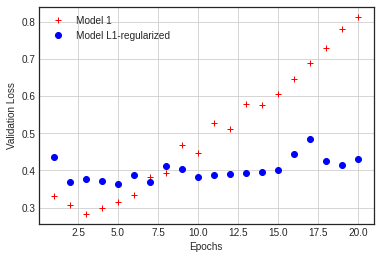

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label = 'Model L1-regularized')
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

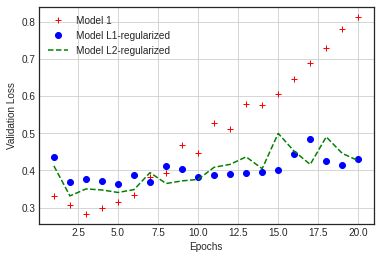

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label = 'Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label = 'Model L2-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

#### L1, L2와 비교

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


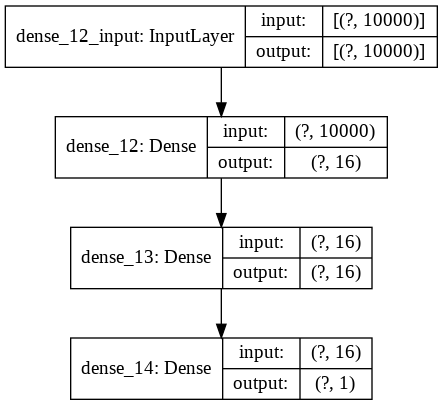

In [ ]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer = l1_l2(l1=0.0001, l2=0.0001), activation = 'relu', input_shape = (10000, )),
                       Dense(16, kernel_regularizer = l1_l2(l1=0.0001, l2=0.0001), activation = 'relu'),
                       Dense(1, activation = 'sigmoid')])

l1_l2_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes = True)

In [ ]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                   epochs = 20,
                                   batch_size = 512,
                                   validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 47ms/step - loss: 0.6300 - acc: 0.7433 - val_loss: 0.4760 - val_acc: 0.8698
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4038 - acc: 0.8852 - val_loss: 0.3822 - val_acc: 0.8857
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3445 - acc: 0.8996 - val_loss: 0.3647 - val_acc: 0.8862
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3247 - acc: 0.9078 - val_loss: 0.3629 - val_acc: 0.8869
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3141 - acc: 0.9127 - val_loss: 0.3620 - val_acc: 0.8862
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3006 - acc: 0.9185 - val_loss: 0.3824 - val_acc: 0.8786
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2985 - acc: 0.9166 - val_loss: 0.3865 - val_acc: 0.8757
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2930 - a

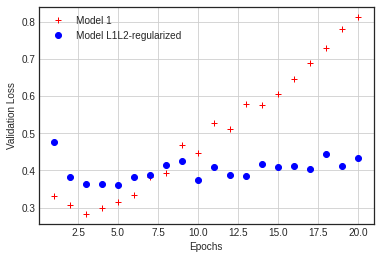

In [ ]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'bo', label = 'Model L1L2-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

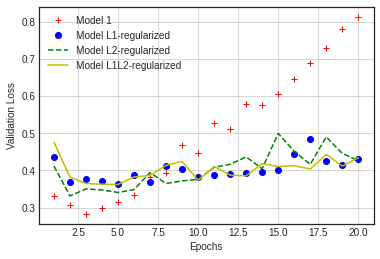

In [ ]:
epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label = 'Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label = 'Model L2-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'y-', label = 'Model L1L2-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [ ]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


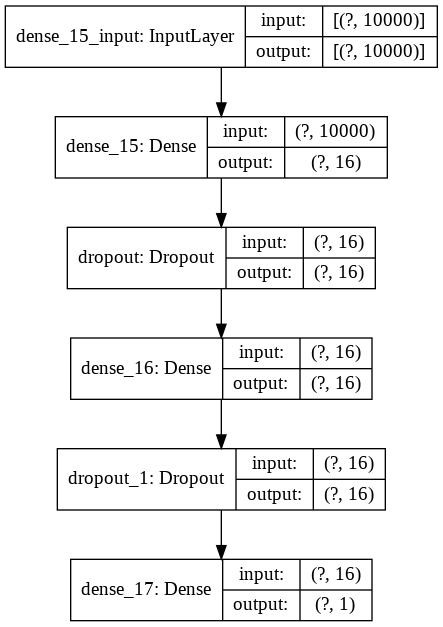

In [ ]:
dropout_model = Sequential([Dense(16, activation = 'relu', input_shape = (10000, )),
                            Dropout(0.5),
                            Dense(16, activation = 'relu'),
                            Dropout(0.5),
                            Dense(1, activation = 'sigmoid')])

dropout_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

dropout_model.summary()
plot_model(dropout_model, show_shapes = True)

#### 모델 학습

In [ ]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                                       epochs = 20,
                                       batch_size = 512,
                                       validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 45ms/step - loss: 0.5817 - acc: 0.7050 - val_loss: 0.4570 - val_acc: 0.8643
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4292 - acc: 0.8271 - val_loss: 0.3487 - val_acc: 0.8784
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3446 - acc: 0.8736 - val_loss: 0.2982 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2919 - acc: 0.8984 - val_loss: 0.2790 - val_acc: 0.8903
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2598 - acc: 0.9135 - val_loss: 0.2957 - val_acc: 0.8849
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2308 - acc: 0.9234 - val_loss: 0.2898 - val_acc: 0.8879
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2078 - acc: 0.9315 - val_loss: 0.3126 - val_acc: 0.8864
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1922 - a

#### 시각화

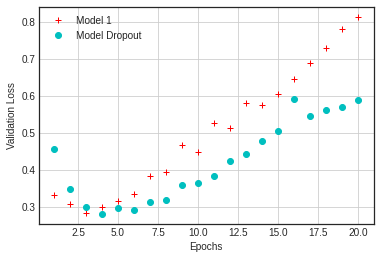

In [ ]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, dropout_model_val_loss, 'co', label = 'Model Dropout')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()